<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/hw1/Homework1_exploratory_data_analysis_for_extremes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)


---


In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 619, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 619 (delta 0), reused 2 (delta 0), pack-reused 615
Receiving objects: 100% (619/619), 169.60 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (320/320), done.
Checking out files: 100% (133/133), done.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 18})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load 2 datasets

In [ ]:
# Load 2 datasets: size for each mined diamond
# For your own dataset, you can click Files on the left bar, and upload your dataset
## Diamond dataset 1
diamond_dataset1 = np.loadtxt('/content/DataScienceForGeosciences/hw1/hw1_dataset1.txt')
## Diamond dataset 2
diamond_dataset2 = np.loadtxt('/content/DataScienceForGeosciences/hw1/hw1_dataset2.txt')

# Histogram

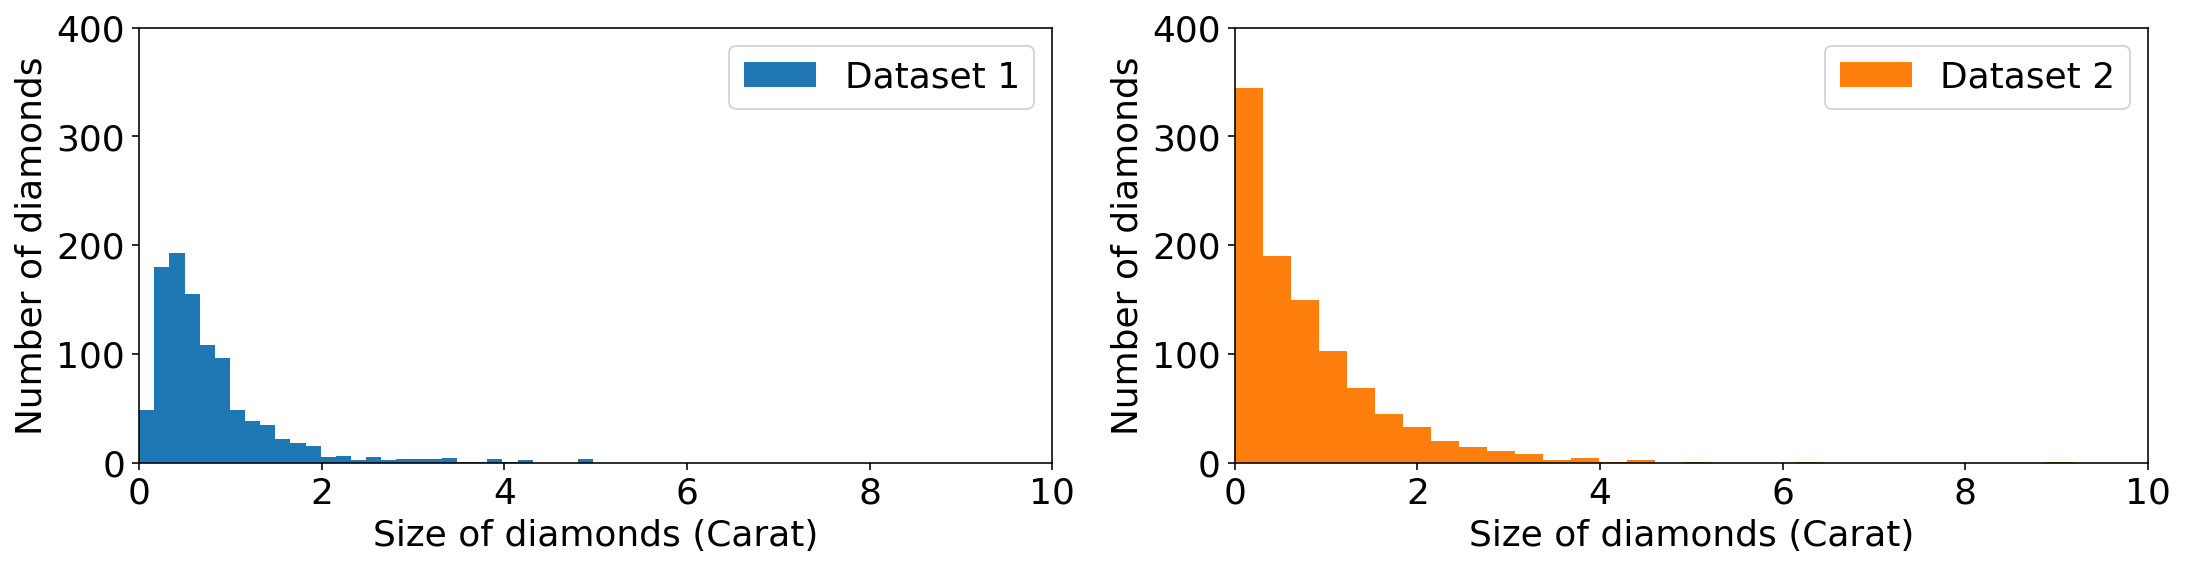

In [ ]:
nbins = 30
plt.figure(figsize = [18,4])
ax = plt.subplot(1, 2, 1)
plt.hist(diamond_dataset1,bins = nbins,alpha = 1,label = 'Dataset 1')
plt.xlim(0,10)
plt.ylim(0,400)

plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.legend()
ax = plt.subplot(1, 2, 2)
plt.hist(diamond_dataset2,bins = nbins,alpha = 1,label = 'Dataset 2',color = 'C1')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.xlim(0,10)
plt.ylim(0,400)
plt.legend()

# Treatment of zeros

This is an open question. Please think about why zeros appear and get your own answer. 

# Summary statistics


## Mean and variance

In [ ]:
## Mean of entire datasets
print('Mean of diamond weights, dataset 1: '+str(np.round(np.mean(diamond_dataset1),2)))
print('Mean of diamond weights, dataset 2: '+str(np.round(np.mean(diamond_dataset2),2)))

## Variance of entire datasets
print('Variance of diamond weights, dataset 1: '+str(np.round(np.var(diamond_dataset1),2)))
print('Variance of diamond weights, dataset 2: '+str(np.round(np.var(diamond_dataset2),2)))

Mean of diamond weights, dataset 1: 0.76
Mean of diamond weights, dataset 2: 0.79
Variance of diamond weights, dataset 1: 0.44
Variance of diamond weights, dataset 2: 0.69


## Median, lower quartile and upper quartile

In [ ]:
print('the lower quartile, dataset 1: '+str(np.round(np.quantile(diamond_dataset1,0.25),2))) # 25% quantile, lower quartile
print('median, dataset 1: '+str(np.round(np.quantile(diamond_dataset1,0.5),2))) # 50% quantile, median
print('the upper quartile, dataset 1: '+str(np.round(np.quantile(diamond_dataset1,0.75),2))) # 75% quantile, upper quartile

the lower quartile, dataset 1: 0.35
median, dataset 1: 0.57
the upper quartile, dataset 1: 0.94


In [ ]:
print('the lower quartile, dataset 2: '+str(np.round(np.quantile(diamond_dataset2,0.25),2))) # 25% quantile, lower quartile
print('median, dataset 2: '+str(np.round(np.quantile(diamond_dataset2,0.5),2))) # 50% quantile, median
print('the upper quartile, dataset 2: '+str(np.round(np.quantile(diamond_dataset2,0.75),2))) # 75% quantile, upper quartile

the lower quartile, dataset 2: 0.22
median, dataset 2: 0.55
the upper quartile, dataset 2: 1.12


## Remove 3 highest/lowest values and see the summary statistics

In [ ]:
sorted_diamond_dataset1 = np.sort(diamond_dataset1)
sorted_diamond_dataset2 = np.sort(diamond_dataset2)
## exclude the biggest x stones: sorted_diamond_dataset1[:-3] 
## exclude the smallest x stones: sorted_diamond_dataset1[3:] 

In [ ]:
print('Mean of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset1[:-3]),2)))
print('Mean of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset2[:-3]),2)))
print('Median of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.median(sorted_diamond_dataset1[:-3]),2)))
print('Median of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.median(sorted_diamond_dataset2[:-3]),2)))
print('Variance of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset1[:-3]),2)))
print('Variance of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset2[:-3]),2)))

Mean of diamond weights, dataset 1, removing the biggest 3 stones: 0.75
Mean of diamond weights, dataset 2, removing the biggest 3 stones: 0.77
Median of diamond weights, dataset 1, removing the biggest 3 stones: 0.57
Median of diamond weights, dataset 2, removing the biggest 3 stones: 0.55
Variance of diamond weights, dataset 1, removing the biggest 3 stones: 0.38
Variance of diamond weights, dataset 2, removing the biggest 3 stones: 0.57


In [ ]:
print('Mean of diamond weights, dataset 1, removing the smallest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset1[3:]),2)))
print('Mean of diamond weights, dataset 2, removing the smallest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset2[3:]),2)))
print('Median of diamond weights, dataset 1, removing the smallest 3 stones: '+str(np.round(np.median(sorted_diamond_dataset1[3:]),2)))
print('Median of diamond weights, dataset 2, removing the smallest 3 stones: '+str(np.round(np.median(sorted_diamond_dataset2[3:]),2)))
print('Variance of diamond weights, dataset 1, removing the smallest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset1[3:]),2)))
print('Variance of diamond weights, dataset 2, removing the smallest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset2[3:]),2)))

Mean of diamond weights, dataset 1, removing the smallest 3 stones: 0.77
Mean of diamond weights, dataset 2, removing the smallest 3 stones: 0.79
Median of diamond weights, dataset 1, removing the smallest 3 stones: 0.57
Median of diamond weights, dataset 2, removing the smallest 3 stones: 0.55
Variance of diamond weights, dataset 1, removing the smallest 3 stones: 0.44
Variance of diamond weights, dataset 2, removing the smallest 3 stones: 0.69


# Quantile plot

## Compare two datasets against each other

Text(0.5, 1.0, 'Quantile-Quantile plot')

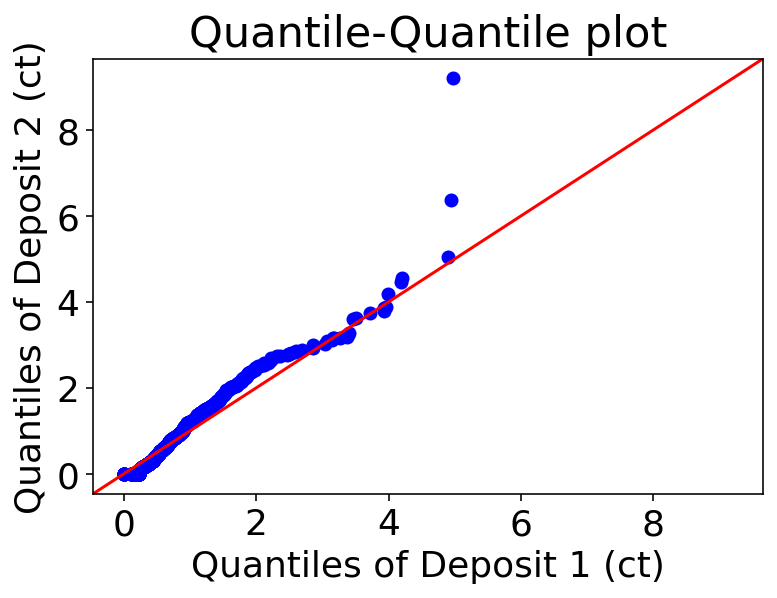

In [ ]:
from statsmodels.graphics.gofplots import qqplot_2samples
## QQplot
qqplot_2samples(diamond_dataset2,diamond_dataset1,line='45')
plt.xlabel('Quantiles of Deposit 1 (ct)')
plt.ylabel('Quantiles of Deposit 2 (ct)')
plt.title('Quantile-Quantile plot')

## Compare with the theoretical quantile

In [ ]:
dataset = diamond_dataset1 # change to your desired dataset

### normal

Text(0, 0.5, 'Sample quantiles')

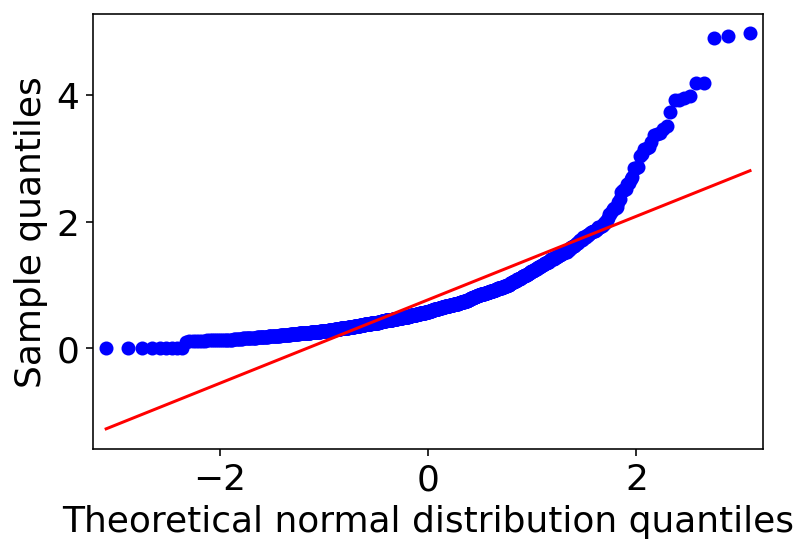

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dataset, line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles')

### log-normal

In [ ]:
dataset[dataset==0] = 0.1 # We treat zeros before we do logarithm. The detection limit is around 0.1. Therefore zeros are the values below the detection limit.

Text(0.5, 1.0, 'Dataset 1')

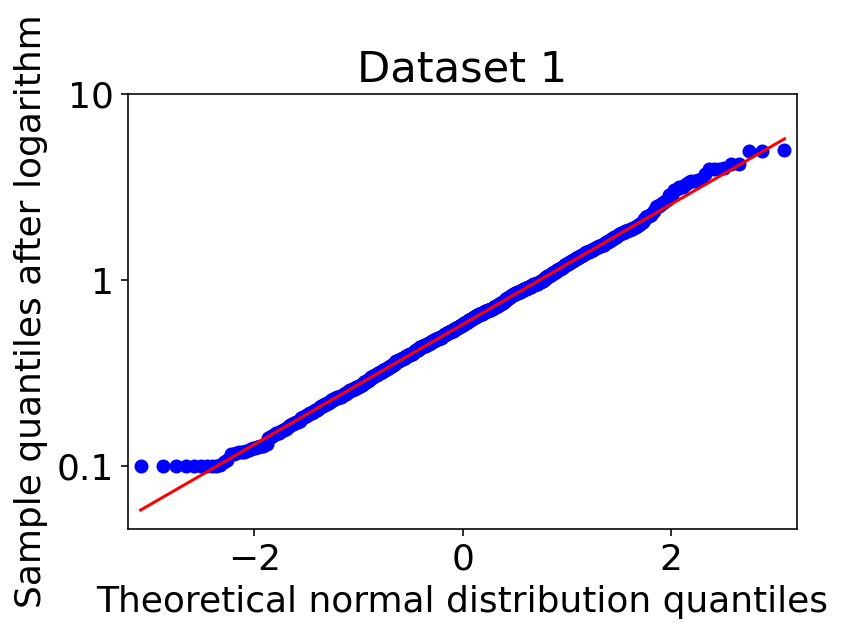

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log10(dataset), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Sample quantiles after logarithm')
plt.yticks([-1,0,1],[0.1,1,10])
plt.title('Dataset 1')

### exponential

In [ ]:
def exponential_quantile(data, title = None):
    data = np.sort(data)[::-1]
    n = len(data)
    plt.scatter(-np.log((np.arange(n)+1)/(n+1)),data, s = 10, color = 'black')
    plt.xlabel('Theoretical exponential distribution quantiles: $-\log(i/(n+1))$')
    plt.ylabel('Sample quantiles: $x_i^*$')
    plt.title(title)

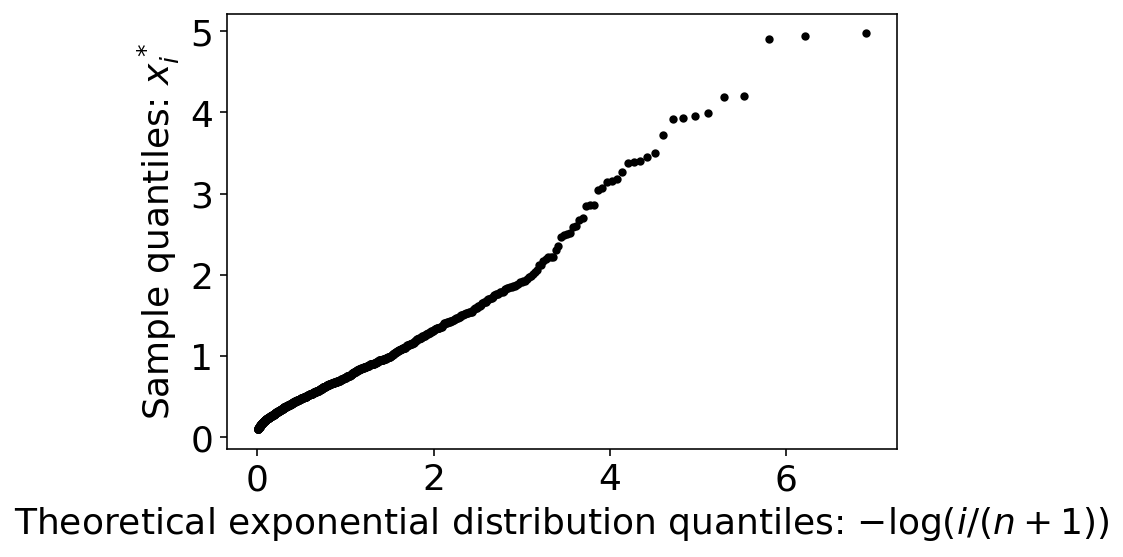

In [ ]:
exponential_quantile(dataset)

### Pareto

In [ ]:
def pareto_quantile(data,title = None):    
    data = np.sort(data)[::-1]
    n = len(data)
    plt.scatter(-np.log((np.arange(n)+1)/(n+1)),np.log10(data),s = 10, color = 'black')
    plt.xlabel('Theoretical exponential distribution quantiles:$-\log(i/(n+1))$')
    plt.ylabel('Sample quantiles \n after logarithm: $\log(x_i^*)$')
    plt.title(title)

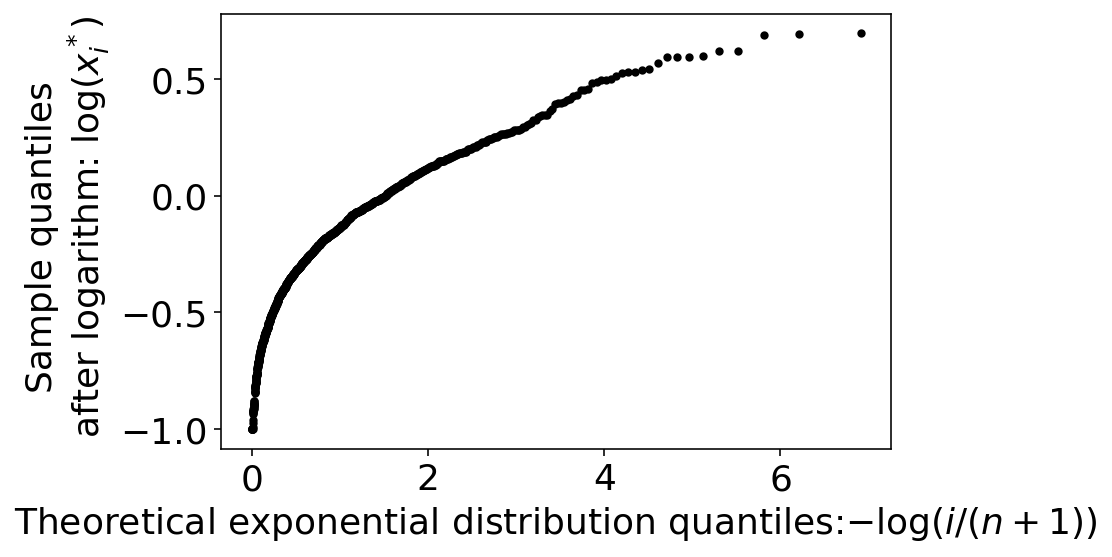

In [ ]:
pareto_quantile(dataset)

# Fit log normal distribution

In [ ]:
dataset = diamond_dataset1 # change to your desired dataset
dataset[dataset==0] = 0.1 # We treat zeros before we do logarithm. The detection limit is around 0.1. Therefore zeros are the values below the detection limit.

In [ ]:
mu = np.mean(np.log(dataset))
print('estimated mean: '+str(mu))

estimated mean: -0.5485788397946569


In [ ]:
sigma = np.std(np.log(dataset))
print('estimated standard deviation: '+str(sigma))

estimated standard deviation: 0.7420717140675943


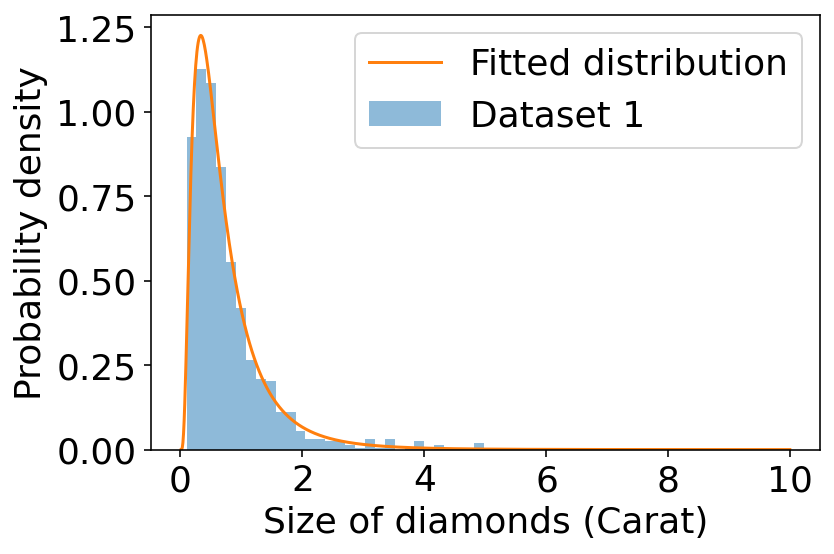

In [ ]:
from scipy.stats import norm
plt.hist(dataset,bins = 30,alpha = 0.5,label = 'Dataset 1',density = True)
x_values = np.arange(1e-2,10,0.01)
log_x_values = np.log(x_values)
plt.plot(x_values,(1/x_values)*norm.pdf(log_x_values,loc=mu, scale = sigma),label = 'Fitted distribution')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Probability density')
plt.legend()

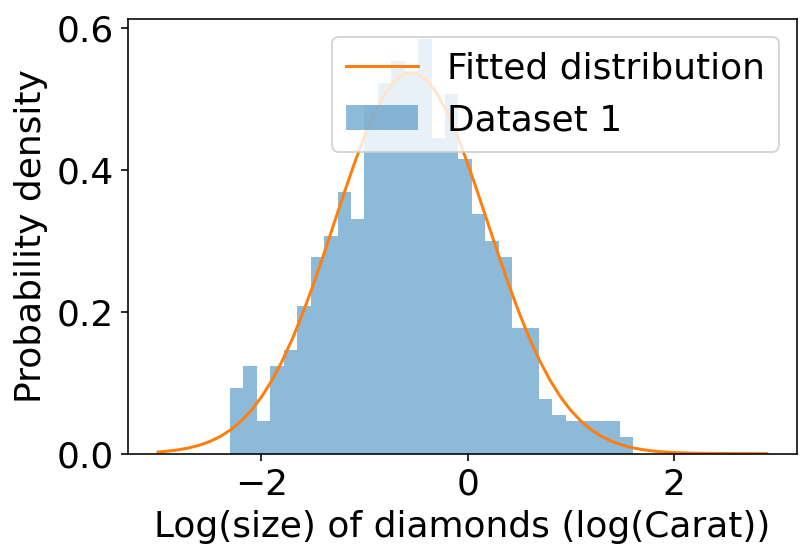

In [ ]:
plt.hist(np.log(diamond_dataset1),bins = 30,alpha = 0.5,label = 'Dataset 1',density = True)
plt.plot(np.arange(-3,3,0.1),norm.pdf(np.arange(-3,3,0.1),  loc=mu, scale=sigma),label = 'Fitted distribution')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Probability density')
plt.legend()